***
## Venn diagram : 

> Anubis : 

In [34]:
import os 
import pandas as pd
from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')

# local :
path_project = "/media/concha-eloko/Linux/PPT_clean"

info_col = ["prot_name","start","end","domain_seq","full_seq","dpo_index"]

df_prophage_label = pd.read_csv(f"{path_project}/prophage_data.clusters_80.phageboost_70.2504.tsv" , sep = "\t", skiprows=1)
df_prophage_label.columns = ["Prophage_name","KL_type","Infected_ancestor","n_clades","siblings","n_ancestors","n_KL_swaps","old_KL_types","all_old_KL_types"]

df_anubis_return_emb = pd.read_csv(f"{path_project}/embeddings/anubis_return.esm2.embedding.csv" , sep = ",", header = None)
df_anubis_return_info = pd.read_csv(f"{path_project}/Anubis_return.predictions.0709.big.annotated.tsv" , sep = "\t", names = info_col)
anubis_sequences = df_anubis_return_info["full_seq"].unique().tolist()
len(anubis_sequences)



4308

> ppt :

In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/15122022_session/Results_III_DataFrame.v3.csv \
/media/concha-eloko/Linux/PPT_clean 


In [1]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"

labels_results = ["protein_name","KL_type_ancestor","ancestor_id","IPR_entry","score","qstart","qstop","sequence"]
results_df = pd.read_csv(f"{path_project}/Results_III_DataFrame.v3.csv", sep="\t", names= labels_results)
ppt_seq_uniq = results_df["sequence"].unique().tolist()

> Minibatch : 


In [ ]:
rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/Bea_hits.seq_unique.fasta \
/media/concha-eloko/Linux/PPT_clean 

rsync -avzhe ssh \
conchae@garnatxa.srv.cpd:/home/conchae/prediction_depolymerase_tropism/prophage_prediction/depolymerase_decipher/Minibatch_hits.75bits.tsv \
/media/concha-eloko/Linux/PPT_clean 


In [36]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"
path_work = "/media/concha-eloko/Linux/PPT_clean"

#minibatch_seq_uniq = [item.split("\n")[1] for item in open(f"{path_project}/Bea_hits.seq_unique.fasta").read().split(">")[1:]]
DF_info_mini = pd.read_csv(f"{path_work}/Minibatch_hits.75bits.tsv", sep = "\t" ,  names = ["protein", "bitscore","sequence"])
minibatch_seq_uniq = set(seq for seq in DF_info_mini["sequence"] if len(seq)<1500)



> Final DF : 


In [37]:
path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df.tsv", sep = "\t" ,  header = 0)
DF_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]


In [38]:
final_unique = DF_lvl_0["seq"].unique().tolist()

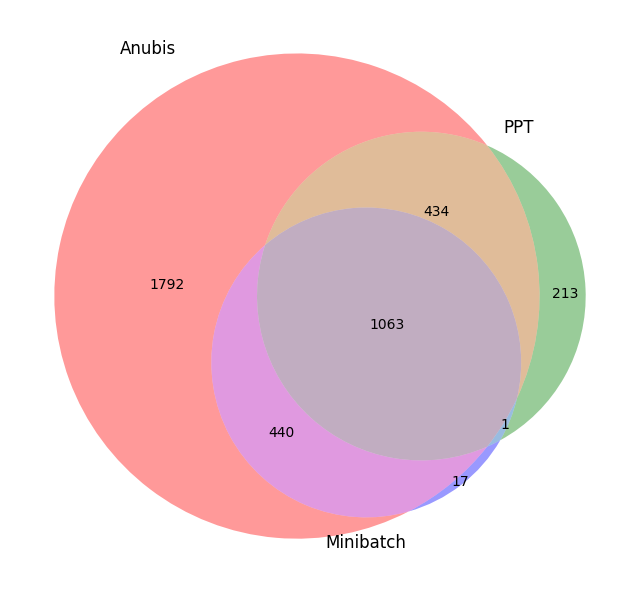

In [39]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set_anubis = set(anubis_sequences)
set_minibatch = set(minibatch_seq_uniq)
set_ppt = set(ppt_seq_uniq)
set_final = set(final_unique)

pred_anubis = set_anubis.intersection(set_final)
pred_ppt = set_ppt.intersection(set_final)
pred_minibatch = set_minibatch.intersection(set_final)


# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn3([pred_anubis, pred_ppt, pred_minibatch], ('Anubis', 'PPT', "Minibatch"))

# Display the plot
plt.show()

In [21]:
classic_methods = pred_ppt.copy()
classic_methods.update(pred_minibatch)

anubis_exclu = pred_anubis.difference(classic_methods)

In [26]:
classic_gold = classic_methods.difference(pred_anubis)
len(classic_gold)

247

In [31]:
common_classic = pred_ppt.intersection(pred_minibatch)
classic_gold = common_classic.difference(pred_anubis)


In [33]:
classic_gold

{'MAEVPLPTPTQVPVPSTDIRNAVFAGAKLDEEVTGAGEFYTDRLGVKRLTNTGRNNQFDAAQLDRANRFEQFLLSSGYVFLGDYEDGPFQFSARNQYIRYNNQYYRLNAATDVGFTTTGTDATSFANDVTHFVLMDGDTLRSNLGSSEEGMGDDIVTHSDGKTVREHIKYLERDKLSFYGSTATGLLNFLAYAAASGRECIVDTVVNLTVAVNFDAQFSNIHLRWEAPINSDTQLFNLHNLGPKSILKDMWFQNITAPWVINRWDTDGNWIDNAEIIANSVVQTNEEAGYQPTASDKDVWPLLSDTVKNQQICGGPIIHTSRGVTVLNPRGRYIAITFMDCNFCKVVQPSVMGGKHQYGTILFNNTGTTAWGKGNKVIDGEVRYGSVSGVVYMRHKGKSSRISGTNAYRCGESGFKTYQNEVNGRSARCYGMKWDNLTAEQCYFDGFDLASDYGDAAQRVDDYKLEQFAWNLLPLKHEVTNLTGLC'}

***
# Get the fold proportions : 

### PPT work :

> From PPT :

In [33]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"

labels_results = ["protein_name","KL_type_ancestor","ancestor_id","IPR_entry","score","qstart","qstop","sequence"]
results_III_df = pd.read_csv(f"{path_project}/Results_III_DataFrame.v3.csv", sep="\t", names= labels_results)
ppt_seq_uniq = results_III_df["sequence"].unique().tolist()

In [17]:
path_work = "/media/concha-eloko/Linux/PPT_clean"

DF_info = pd.read_csv(f"{path_work}/TropiGATv2.final_df.tsv", sep = "\t" ,  header = 0)
DF_lvl_0 = DF_info[~DF_info["KL_type_LCA"].str.contains("\\|")]

final_unique = DF_lvl_0["seq"].unique().tolist()
all_final_unique = DF_info["seq"].unique().tolist()

In [18]:
set_ppt = set(ppt_seq_uniq)
set_final = set(all_final_unique)
pred_ppt = set_ppt.intersection(set_final)

> Get the sequences that matter

In [6]:
from Bio.PDB import PDBParser
from Bio.PDB.Polypeptide import PPBuilder
import warnings
from tqdm import tqdm

# Suppress all warnings
warnings.filterwarnings('ignore')

path_ppt_pdb = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/output_ppt"

dico_seq_index = {}
parser = PDBParser()
ppb = PPBuilder()

for pdb_file in tqdm(os.listdir(path_ppt_pdb)) :
    index_file = pdb_file.split(".")[0]
    structure = parser.get_structure('PDB_structure', f"{path_ppt_pdb}/{index_file}.pdb")
    for pp in ppb.build_peptides(structure):
        sequence = pp.get_sequence()
        dico_seq_index[index_file] = str(sequence)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5679/5679 [06:13<00:00, 15.21it/s]


> Get the index : 

In [21]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_PPT"

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)


outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results = {}
n = 0

dico_folds_ppt = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }
depos_indices = []
unique_sequences = set()

for results in tqdm(outputs) :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["Folds"].values[0]
        if fold not in ["jelly-roll", "Other"] :
            if row["prob"] >= 0.5 :
                if row["query"] not in dico_folds_ppt[fold] :
                    n += 1
                    dico_folds_ppt[fold].append(row["query"])
                    depos_indices.append(row["query"])
                    unique_sequences.add(str(dico_seq_index[str(row["query"]).split(".")[0]]))
                    break
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                if row["query"] not in dico_folds_ppt[fold] :
                    n += 1
                    dico_folds_ppt[fold].append(row["query"])
                    depos_indices.append(row["query"])
                    unique_sequences.add(str(dico_seq_index[str(row["query"]).split(".")[0]]))
                    break


In [22]:
for fold in dico_folds_ppt : 
    print(f"The {fold} presented {len(dico_folds_ppt[fold])} depolymerases.\n")

print(n , len(unique_sequences))

The jelly-roll presented 0 depolymerases.

The alpha/alpha toroid presented 19 depolymerases.

The right-handed beta-helix presented 1443 depolymerases.

The TIM beta/alpha-barrel presented 317 depolymerases.

The 6-bladed beta-propeller presented 65 depolymerases.

The Flavodoxin-like presented 0 depolymerases.

The Alpha/Beta hydrolase fold presented 125 depolymerases.

The Other presented 0 depolymerases.

1969 1969


In [47]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_PPT"

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)

dico_folds_ppt = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results = {}
n = 0
missing_seq_eff = 0
o = 0
m_seq_parra = set()

m_seq = set()

for results in tqdm(outputs) :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    query = 0
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["Folds"].values[0]
        if fold not in ["jelly-roll", "Other"] :
            if row["prob"] >= 0.5 :
                query = row["query"]
                break
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                query = row["query"]
                break
    seq_query = dico_seq_index[str(query).split(".")[0]]
    if seq_query not in set_final and len(seq_query) >= 200:
        missing_seq_eff += 1 
        m_seq.add((seq_query , query))
        m_seq_parra.add(seq_query)
    else : 
        o += 1

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5679/5679 [00:20<00:00, 274.70it/s]


In [48]:
missing_seq_eff , len(m_seq) , len(m_seq_parra)

(4035, 326, 326)

In [45]:
wdym_seq = set()
n = 0
for m_depo in m_seq :
    if m_depo[0] not in results_III_df["sequence"] :
        wdym_seq.add(m_depo)
        if m_depo[0][0] != "M" :
            n += 1


In [46]:
len(wdym_seq) , n

(326, 47)

In [44]:
wdym_seq

{('AESVSEAKDAAVVAGLARDEAKDIASGLSASIDFELAAKEAEFESQMQGQRTAFEVSQQDKESDFLSSQSQREADFVESQTDRENRFQTFLDSSGYVFLGDYENGPFQFSARNQYIRYNNQYYRLNAATDVGFTTTGTDATSFANDVTHFVLMDGDTLRQNLGSSEPGMGAGISKLEQPGNVQNALREFYADAFPGIDPTGQTSSTQGILDAIAQINSQVDSTFNGDITTYPRLVFRGGVFLAAGLLVKSNIVIEGNDGTLFVPEAGTDASHVWITKGTEATTPSGGAKRLFRPVFRNIKIGYGFQNKFDDVVIAENVGGIKLEHSSYAIMENVEMRYLDGEGLTGESVWDSTIYNVRIMHCGNTRDRNNIKYGLNFGPGNDGTDGSNANRFIGLHIETCPAMMKFGKRSRHNFIIGGKLEGIRNNDPLAYGPSVFEGVDGLQFIGVELSWSNIGHRMFRAVGTTVMNDTSDDDTSDYDNDHCRGIEFIGCHTIDSQNLSGDYFEYSSKRGRLNITGGYMHHVRYLLTGSDINLRGVTLTQCGPTLGNIVDNVLVEGLTVENHRVLPSGTFNVFSVSGKNNIIRNSHFSTPYGSNSNGCAWIAQSSVADLRVENVTFGGKMQWGIKGAPSAFQYKKFKNLVLADGADYGEIVQGGFSVDGLPTRLINNNCGAASLMQEVAANTTAIFRGCIHGSASLTIRVENSAGAYVGAATALTDFSVGTPLITGNLSGNFTAGGSGSPGDGRFYISSSGNDLSFTNRTTGTVKVYLISINAKM',
  '4480.pdb'),
 ('ASIRNQGGFFPEIHEDAFDKLTMLVQQAYGWWSGLSLRKPSWLANYYDALNNRIRNLRDPSQAQDAATKRYTDALYNDAIIHADENFNKSVRVTDSSIPSLPGIASRRNKILAFNNEGNPIVVLPESGSAADVLIELGSSAIPGSSLVMHSDGKTVQQYINILNRRTSFVMPEDFAGTDTQQLLAALSYAKTNGIGRIEL

In [53]:
uniqued_on_seq = results_III_df.drop_duplicates(subset = ["sequence"])
uniqued_on_seq.index = range(0,len(uniqued_on_seq))
uniqued_on_seq

,protein_name,KL_type_ancestor,ancestor_id,IPR_entry,score,qstart,qstop,sequence
0,GCF_016651625.1__phage29__132,KL43,GCF_016651625.1,IPR013830.70,20.6,31,76,MKIALMMENSQANKNAIILKELNAVADEKGFPVYNVGMSDENDHHL...
1,GCF_016651625.1__phage29__142,KL43,GCF_016651625.1,IPR005604.78,122.8,6,154,MSVPNQTPYNIYTANGLTTVFTYEFYIISASDLRVSINGDVVTSGY...
2,GCF_016651625.1__phage29__137,KL43,GCF_016651625.1,IPR013785.74,33.8,52,146,MFSGLCAFPLTPLHQQKFDEKAFIRILARLTDAGVDSLGILGSTGS...
3,GCF_016651625.1__phage10__27,KL1,n1717,IPR023346.10,47.1,17,120,MLSTTAFLAIAMQCAASIHPSTAFDVARVESGFNPYAIAEIVPKAG...
4,GCF_016651625.1__phage12__59,KL43,n1471,IPR000743.58,102.8,42,349,MSISKRNFLKAVSCAYFFYSFKALTKVNQPIEDYISTKDKNTWPSK...
...,...,...,...,...,...,...,...,...
7150,GCF_018137815.1__phage7__6,KL63,GCF_018137815.1,IPR000743.5,295.7,69,381,MLGGFIVFIAFMNFAQGGDIRNVSQPEIPLSCKVLKADKSVDSTRA...
7151,GCF_018137815.1__phage6__194,KL63,GCF_018137815.1,IPR013785.20,70.3,4,53,MIVSAPSDYREAARRRLPRFLFDYIDGGAVAENTMNANATELASVA...
7152,GCF_004833805.1__phage8__41,KL10,n760760,IPR002925.6,41.3,17,235,MTQSAMCIPLWPARNGNTAHLVMCPFAGGSSSAFRHWQAEQLADCA...
7153,GCF_006151965.1__phage17__9,KL39,GCF_006151965.1,IPR023346.43,42.7,466,510,MVAKSIVDIDVNDDKFVAFMERFREYQSALDDLPEAWRVAAVGIGE...


In [62]:
uniqued_on_seq.iloc[5065]["sequence"]

'MAVLEVCCYSMECAREAERCGADRIELCAAPQEGGLTPSYGVLVSAREAITLPVHPIVRPRGGDFCYTEEEFAAMLNDIRMVRDLGFPGLVTGVLDADGQIDIPRMKKIMAAAGPLAVTFHRAFDLCADPRQAWKTLGELGVKRILTSGQQSSAEKGISLITELIAAGDTPIIMAGAGVRAANLPLFLQAGVKEVHSSAGHWLPSEMRFRHPGVSMSADPDADEYRRYAVNGAAVAEMKRIISAWRS'

In [60]:
DF_info[DF_info["Phage"] == " GCF_013415495.1__phage12"]

,Phage,Protein_name,KL_type_LCA,Infected_ancestor,index,Dataset,seq,domain_seq,1,2,...,1272,1273,1274,1275,1276,1277,1278,1279,1280,prophage_id


In [64]:
results_III_df[results_III_df["sequence"] == uniqued_on_seq.iloc[6731]["sequence"]]

,protein_name,KL_type_ancestor,ancestor_id,IPR_entry,score,qstart,qstop,sequence
321920,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.43,304.0,24,763,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321921,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.13,262.7,322,733,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321922,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.14,181.9,330,741,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321923,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.27,171.9,322,772,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321924,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.0,166.5,341,736,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321925,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.3,149.5,307,764,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321926,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.26,80.9,414,704,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...
321927,GCF_016758865.1__phage10__2759,KL49,GCF_016758865.1,IPR000514.61,34.0,440,557,MEQHSGDFSVTVRDVRQLSQPESDLLTLLWVLEGSVNLAEAEGAPQ...


***
# Check Minibatch : 

In [65]:
import pandas as pd 
import os 

path_project = "/media/concha-eloko/Linux/PPT_clean"
path_work = "/media/concha-eloko/Linux/PPT_clean"

#minibatch_seq_uniq = [item.split("\n")[1] for item in open(f"{path_project}/Bea_hits.seq_unique.fasta").read().split(">")[1:]]
DF_info_mini = pd.read_csv(f"{path_work}/Minibatch_hits.75bits.tsv", sep = "\t" ,  names = ["protein", "bitscore","sequence"])
minibatch_seq_uniq = set(seq for seq in DF_info_mini["sequence"] if len(seq)<1500)



In [78]:
pred_minibatch_all = minibatch_seq_uniq.intersection(set_final) 
pred_minibatch = {seq for seq in pred_minibatch_all if seq not in ppt_seq_uniq}

len(pred_minibatch)

474

In [72]:
import pandas as pd
import os 
from tqdm import tqdm

path_project = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023"
dir_out = f"{path_project}/seekfold_minibatch"

path_info = f"/media/concha-eloko/Linux/depolymerase_building/depolymerase_fold.csv"
info_df = pd.read_csv(path_info , sep = "\t", header = 0)


outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results = {}
n = 0

dico_folds_minibatch = {"jelly-roll" : [],
              "alpha/alpha toroid" : [],
              "right-handed beta-helix" : [] ,
              "TIM beta/alpha-barrel" : [],
              "6-bladed beta-propeller" : [] ,
              "Flavodoxin-like" : [] ,
              "Alpha/Beta hydrolase fold" : [] ,
              "Other" : [],
             }

outputs = [f"{dir_out}/{file}" for file in os.listdir(dir_out) if file[-3:]=="out"]
header_seekfold = ["query","target","pident","alnlen","gapopen","qstart","qend","tstart","tend","bits","prob"]
depo_results_minibatch = {}
depo_results_minibatch_list = []


for results in tqdm(outputs) :
    results_df = pd.read_csv(f"{results}", sep = "\t" , names = header_seekfold)
    for _,row in results_df.iterrows() :
        fold = info_df[info_df["ID"] == row["target"]]["Folds"].values[0]
        if fold not in ["jelly-roll", "Other"] :
            if row["prob"] >= 0.5 :
                if row["query"] not in dico_folds_minibatch[fold] :
                    dico_folds_minibatch[fold].append(row["query"])
            elif fold == "right-handed beta-helix" and row["prob"] >= 0.2 :
                if row["query"] not in dico_folds_minibatch[fold] :
                    dico_folds_minibatch[fold].append(row["query"])
                
for fold in dico_folds_minibatch : 
    print(f"The {fold} presented {len(dico_folds_minibatch[fold])} depolymerases.\n")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2199/2199 [00:12<00:00, 174.40it/s]

The jelly-roll presented 0 depolymerases.

The alpha/alpha toroid presented 13 depolymerases.

The right-handed beta-helix presented 620 depolymerases.

The TIM beta/alpha-barrel presented 11 depolymerases.

The 6-bladed beta-propeller presented 5 depolymerases.

The Flavodoxin-like presented 0 depolymerases.

The Alpha/Beta hydrolase fold presented 0 depolymerases.

The Other presented 0 depolymerases.



In [73]:
len(minibatch_seq_uniq)

3516